<a href="https://colab.research.google.com/github/chjayarajesh/Brain-Stroke-detection-and-Segmentation/blob/main/Brain_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Stroke classification and segmentation**

Using Kaggle API to import dataset

In [1]:
!pip install -q kaggle timm

# Upload kaggle.json from your Kaggle account (Account → API → Create New Token)
from google.colab import files
files.upload()

# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


Downloading Dataset

In [2]:
# Download the Brain Stroke CT Dataset
!kaggle datasets download -d ozguraslank/brain-stroke-ct-dataset -p /content/dataset

# Unzip the dataset
!unzip -q /content/dataset/brain-stroke-ct-dataset.zip -d /content/dataset


Dataset URL: https://www.kaggle.com/datasets/ozguraslank/brain-stroke-ct-dataset
License(s): other
 99% 1.39G/1.41G [00:09<00:00, 222MB/s]
100% 1.41G/1.41G [00:09<00:00, 161MB/s]


# **Classification Model training**

---


Dataset Segregating into Train,Test and validate

---


Preproccesing and augmentation of dataset

---

ConvNext model -(Convolutional Next)


Hemorrhagic: Train 765, Val 164, Test 164
Ischemic: Train 791, Val 169, Test 170
Normal: Train 3098, Val 664, Test 665
Number of training samples: 4654
Number of validation samples: 997
Number of test samples: 999
Classes: ['Hemorrhagic', 'Ischemic', 'Normal']
Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

Starting epoch 1/10


Epoch 1/10: 100%|██████████| 146/146 [03:42<00:00,  1.53s/it, loss=0.4642]


Epoch [1/10], Loss: 0.5056, Val Loss: 0.1879, Val Acc: 0.9278, Precision: 0.9263, Recall: 0.9278, F1: 0.9263
Starting epoch 2/10


Epoch 2/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.1451]


Epoch [2/10], Loss: 0.1969, Val Loss: 0.2226, Val Acc: 0.9238, Precision: 0.9274, Recall: 0.9238, F1: 0.9175
Starting epoch 3/10


Epoch 3/10: 100%|██████████| 146/146 [03:40<00:00,  1.51s/it, loss=0.1384]


Epoch [3/10], Loss: 0.0946, Val Loss: 0.1511, Val Acc: 0.9549, Precision: 0.9562, Recall: 0.9549, F1: 0.9551
Starting epoch 4/10


Epoch 4/10: 100%|██████████| 146/146 [03:38<00:00,  1.50s/it, loss=0.0354]


Epoch [4/10], Loss: 0.0711, Val Loss: 0.1125, Val Acc: 0.9599, Precision: 0.9602, Recall: 0.9599, F1: 0.9600
Starting epoch 5/10


Epoch 5/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.0041]


Epoch [5/10], Loss: 0.0496, Val Loss: 0.0985, Val Acc: 0.9709, Precision: 0.9707, Recall: 0.9709, F1: 0.9707
Starting epoch 6/10


Epoch 6/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.0084]


Epoch [6/10], Loss: 0.0265, Val Loss: 0.1108, Val Acc: 0.9599, Precision: 0.9600, Recall: 0.9599, F1: 0.9593
Starting epoch 7/10


Epoch 7/10: 100%|██████████| 146/146 [03:36<00:00,  1.48s/it, loss=0.0325]


Epoch [7/10], Loss: 0.0324, Val Loss: 0.1472, Val Acc: 0.9629, Precision: 0.9627, Recall: 0.9629, F1: 0.9625
Starting epoch 8/10


Epoch 8/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.0007]


Epoch [8/10], Loss: 0.0466, Val Loss: 0.1300, Val Acc: 0.9649, Precision: 0.9650, Recall: 0.9649, F1: 0.9646
Starting epoch 9/10


Epoch 9/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.0896]


Epoch [9/10], Loss: 0.0191, Val Loss: 0.1339, Val Acc: 0.9689, Precision: 0.9691, Recall: 0.9689, F1: 0.9687
Starting epoch 10/10


Epoch 10/10: 100%|██████████| 146/146 [03:37<00:00,  1.49s/it, loss=0.0012]


Epoch [10/10], Loss: 0.0123, Val Loss: 0.1361, Val Acc: 0.9659, Precision: 0.9658, Recall: 0.9659, F1: 0.9653


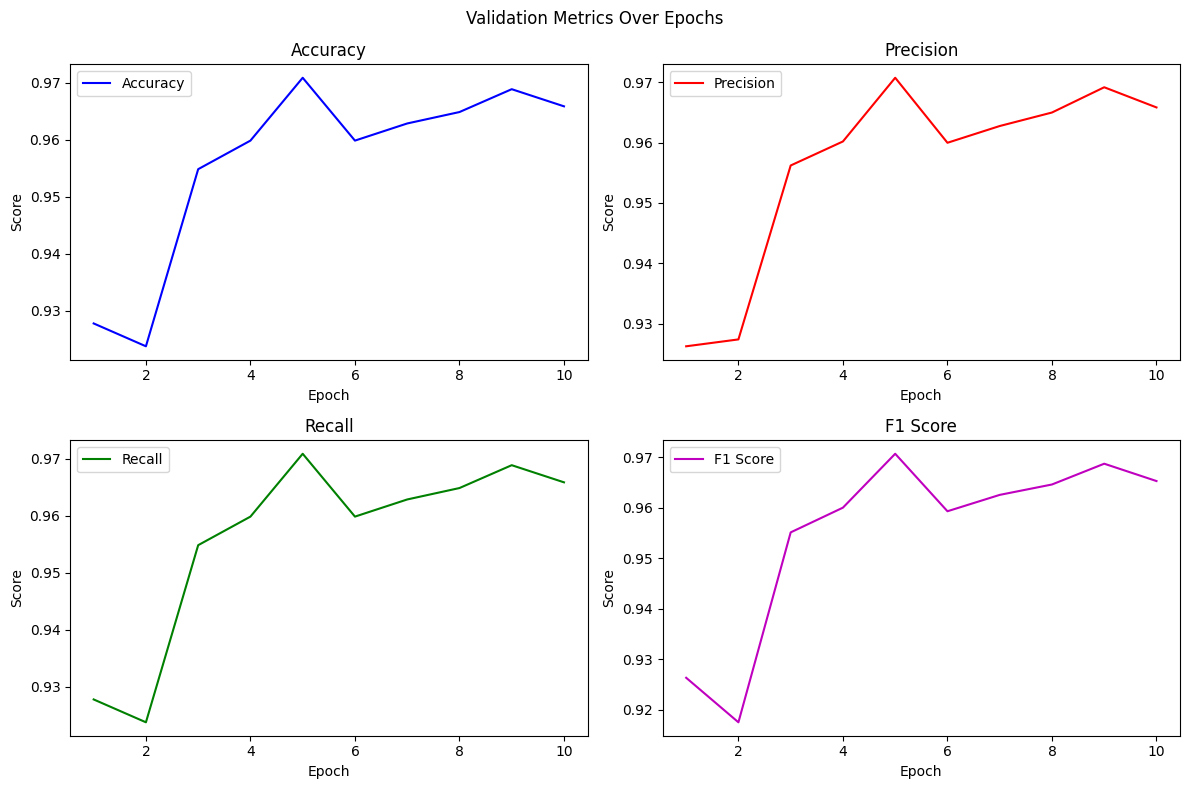

Accuracy: 0.9540
Precision: 0.9536
Recall: 0.9540
F1 Score: 0.9532


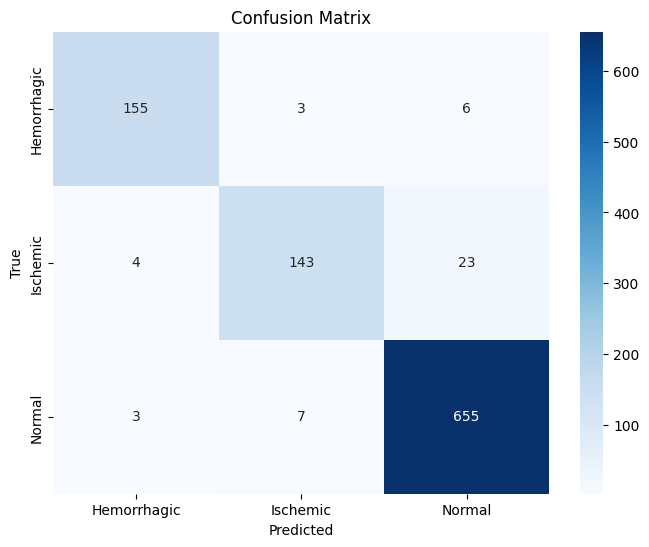

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm  # For progress bar

# Step 1: Segregate images into train, val, test
def segregate_dataset(base_dir, classes, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    for cls in classes:
        png_dir = os.path.join(base_dir, cls, 'PNG')
        if not os.path.exists(png_dir):
            print(f"PNG folder not found for {cls}. Skipping...")
            continue

        images = [os.path.join(png_dir, f) for f in os.listdir(png_dir) if f.lower().endswith('.png')]
        if len(images) == 0:
            print(f"No PNG images found for {cls}. Skipping...")
            continue

        # Split into train/val/test
        train_images, test_images = train_test_split(images, test_size=val_ratio + test_ratio, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create directories
        train_dir = os.path.join(base_dir, 'train', cls)
        val_dir = os.path.join(base_dir, 'val', cls)
        test_dir = os.path.join(base_dir, 'test', cls)

        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Copy images
        for img in train_images:
            shutil.copy(img, train_dir)
        for img in val_images:
            shutil.copy(img, val_dir)
        for img in test_images:
            shutil.copy(img, test_dir)

        print(f"{cls}: Train {len(train_images)}, Val {len(val_images)}, Test {len(test_images)}")

# Base directory (adjust to your Colab path, e.g., if mounted from Drive)
base_dir = '/content/dataset/Brain_Stroke_CT_Dataset'  # Update to your actual path in Colab
classes = ['Hemorrhagic', 'Ischemic', 'Normal']  # Ignore External_Test

# Run segregation
segregate_dataset(base_dir, classes)

# Step 2: Preprocessing and Training
# Custom transform to replicate grayscale to 3 channels
class GrayscaleToRGB:
    def __call__(self, image):
        if image.shape[0] == 1:
            return torch.cat([image] * 3, dim=0)
        return image

# Custom Dataset with 3-channel replication
class CTDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.class_names = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.class_names)}

        for cls_name in self.class_names:
            cls_dir = os.path.join(data_dir, cls_name)
            if os.path.isdir(cls_dir):
                for img_name in os.listdir(cls_dir):
                    img_path = os.path.join(cls_dir, img_name)
                    if os.path.isfile(img_path):
                        self.images.append(img_path)
                        self.labels.append(self.class_to_idx[cls_name])
        if not self.images:
            raise ValueError(f"No images found in {data_dir}. Check your dataset path and ensure it contains image subfolders.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        try:
            image = Image.open(img_path).convert('L')  # Load as grayscale
            if self.transform:
                image = self.transform(image)  # Apply full transform pipeline
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return torch.zeros(3, 224, 224), label  # Return 3-channel placeholder

# Load datasets (after segregation, use the train/val/test directories)
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    GrayscaleToRGB(),  # Replicate to 3 channels after ToTensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 3-channel normalization
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    GrayscaleToRGB(),  # Replicate to 3 channels after ToTensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = CTDataset(train_dir, transform=train_transform)
val_dataset = CTDataset(val_dir, transform=val_test_transform)
test_dataset = CTDataset(test_dir, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.class_names}")

# Set device
torch.cuda.empty_cache()
device = torch.device("cuda") #if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load pre-trained ConvNeXt-Base model
model = timm.create_model('convnext_base', pretrained=True)
model.reset_classifier(num_classes=3)  # 3 classes: hemorrhagic, ischemic, normal
model = model.to(device)


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_acc = 0.0
    val_accuracies = []
    val_precisions = []
    val_recalls = []
    val_f1_scores = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        print(f"Starting epoch {epoch + 1}/{num_epochs}")
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}") as pbar:
            for i, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                pbar.set_postfix({'loss': f'{loss.item():.4f}'})
                pbar.update(1)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_val_loss = val_loss / len(val_loader)
        epoch_acc = accuracy_score(all_labels, all_preds)
        epoch_precision = precision_score(all_labels, all_preds, average='weighted')
        epoch_recall = recall_score(all_labels, all_preds, average='weighted')
        epoch_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_accuracies.append(epoch_acc)
        val_precisions.append(epoch_precision)
        val_recalls.append(epoch_recall)
        val_f1_scores.append(epoch_f1)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_acc:.4f}, Precision: {epoch_precision:.4f}, Recall: {epoch_recall:.4f}, F1: {epoch_f1:.4f}')

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model_3class.pth')

    # Plot graphs for 4 parameters
    epochs = range(1, num_epochs + 1)
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Validation Metrics Over Epochs')

    # Accuracy graph
    axs[0, 0].plot(epochs, val_accuracies, label='Accuracy', color='b')
    axs[0, 0].set_title('Accuracy')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].legend()

    # Precision graph
    axs[0, 1].plot(epochs, val_precisions, label='Precision', color='r')
    axs[0, 1].set_title('Precision')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend()

    # Recall graph
    axs[1, 0].plot(epochs, val_recalls, label='Recall', color='g')
    axs[1, 0].set_title('Recall')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].legend()

    # F1 Score graph
    axs[1, 1].plot(epochs, val_f1_scores, label='F1 Score', color='m')
    axs[1, 1].set_title('F1 Score')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.savefig('validation_metrics_graphs.png')  # Save the figure
    plt.show()
    return val_accuracies, val_precisions, val_recalls, val_f1_scores

# Evaluate function
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hemorrhagic', 'Ischemic', 'Normal'], yticklabels=['Hemorrhagic', 'Ischemic', 'Normal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')  # Save the confusion matrix
    plt.show()

# Train the model and get metrics
val_accuracies, val_precisions, val_recalls, val_f1_scores = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Load best model and evaluate
model.load_state_dict(torch.load('best_model_3class.pth'))
evaluate_model(model, test_loader)